In [ ]:
def query_database(query: str, values:tuple, verbose: bool = False) -> list:
    try:
        # Creating a connection pool
        connection_pool = psycopg2.pool.SimpleConnectionPool(
            minconn=1,
            maxconn=5,
            host="seedzdatabase.crygwiotn2wx.us-east-1.rds.amazonaws.com",
            database="seedzdatabase",
            user="seedzadmin",
            password="senhaseedz123"
        )

        # Acquiring a connection from the pool
        connection = connection_pool.getconn()

        # Creating a cursor object to execute SQL queries
        cursor = connection.cursor()

        # Example query: Fetch all rows from a table
        cursor.execute(query, values)

        col_names = [desc[0] for desc in cursor.description]

        query_result = cursor.fetchall()

        obj_list = []
        for item in query_result:
            item = list(item)
            Dict = {}

            for key in col_names:
                for value in item:
                    Dict[key] = value
                    item.remove(value)
                    break
            obj_list.append(Dict)

        # Releasing the connection back to the pool
        cursor.close()
        connection_pool.putconn(connection)

        # Closing the connection pool
        connection_pool.closeall()

        if verbose:
            print(f"[ {datetime.now()} ] - {len(obj_list)} objects were queried ")

        return obj_list

    except Exception as e:
        print(f"ERROR: Exception when querying the db \n*{e}\n")


In [ ]:
import psycopg2.pool
import datetime as datetime

# Creating a connection pool
connection_pool = psycopg2.pool.SimpleConnectionPool(
    minconn=1,
    maxconn=5,
    host="seedzdatabase.crygwiotn2wx.us-east-1.rds.amazonaws.com",
    database="seedzdatabase",
    user="seedzadmin",
    password="senhaseedz123"
)

# Acquiring a connection from the pool
connection = connection_pool.getconn()

# Creating a cursor object to execute SQL queries
cursor = connection.cursor()

# Example query: Fetch all rows from a table
query = "select * from weather.grid_weather_data gwd;"
cursor.execute(query)
rows = cursor.fetchall()

# Printing the fetched rows
for row in rows:
    print(row)

# Releasing the connection back to the pool
cursor.close()
connection_pool.putconn(connection)

# Closing the connection pool
connection_pool.closeall()

In [ ]:
query = 'select * from weather.grid_weather_data gwd limit %s;'
values = [21]

obj_list = query_database(query, values, True)

In [82]:
import pandas as pd
from datetime import datetime
import psycopg2.pool


# Question 1

### Reading From DB

In [83]:
def query_database(query: str, values:tuple, verbose: bool = False) -> list:
    try:
        # Creating a connection pool
        connection_pool = psycopg2.pool.SimpleConnectionPool(
            minconn=1,
            maxconn=5,
            host="seedzdatabase.crygwiotn2wx.us-east-1.rds.amazonaws.com",
            database="seedzdatabase",
            user="seedzadmin",
            password="senhaseedz123"
        )

        # Acquiring a connection from the pool
        connection = connection_pool.getconn()

        # Creating a cursor object to execute SQL queries
        cursor = connection.cursor()

        # Example query: Fetch all rows from a table
        cursor.execute(query, values)

        col_names = [desc[0] for desc in cursor.description]

        print(col_names)

        query_result = cursor.fetchall()

        obj_list = []
        for item in query_result:
            item = list(item)
            Dict = {}

            for key in col_names:
                for value in item:
                    Dict[key] = value
                    item.remove(value)
                    break
            obj_list.append(Dict)

        # Releasing the connection back to the pool
        cursor.close()
        connection_pool.putconn(connection)

        # Closing the connection pool
        connection_pool.closeall()

        if verbose:
            print(f"[ {datetime.now()} ] - {len(obj_list)} objects were queried ")

        return obj_list

    except Exception as e:
        print(f"ERROR: Exception when querying the db \n*{e}\n")


In [84]:
query = 'select * from weather.grid_weather_data gwd;'
values = []

obj_list = query_database(query, values, True)

df = pd.DataFrame(obj_list)

['cod_city', 'date', 'hour', 'precipitation', 'dry_bulb_temperature', 'wet_bulb_temperature', 'high_temperature', 'low_temperature', 'relative_humidity', 'relative_humidity_avg', 'pressure', 'sea_pressure', 'wind_direction', 'wind_speed_avg', 'cloud_cover', 'evaporation']
[ 2023-07-01 21:50:59.825265 ] - 115391 objects were queried 


In [85]:
numerical_columns = ['precipitation', 'dry_bulb_temperature', 'wet_bulb_temperature', 'high_temperature', 'low_temperature', 'relative_humidity', 'relative_humidity_avg', 'pressure', 'sea_pressure', 'wind_speed_avg', 'cloud_cover', 'evaporation']

In [86]:
df.isnull().sum()

cod_city                     0
date                         0
hour                         0
precipitation            76698
dry_bulb_temperature      5966
wet_bulb_temperature     16473
high_temperature         79166
low_temperature          78710
relative_humidity         9648
relative_humidity_avg    81742
pressure                 19480
sea_pressure             69868
wind_direction           11324
wind_speed_avg           82790
cloud_cover              81082
evaporation              10299
dtype: int64

In [87]:
for col in df:
    if df[col].isnull().mean()>0:
        print(col, round(df[col].isnull().mean(),4))

precipitation 0.6647
dry_bulb_temperature 0.0517
wet_bulb_temperature 0.1428
high_temperature 0.6861
low_temperature 0.6821
relative_humidity 0.0836
relative_humidity_avg 0.7084
pressure 0.1688
sea_pressure 0.6055
wind_direction 0.0981
wind_speed_avg 0.7175
cloud_cover 0.7027
evaporation 0.0893


In [ ]:
df_numerical = df.drop(columns=['cod_city', 'date', 'hour', 'wind_direction'])

In [ ]:
print(round(df_numerical.describe()),2)


In [ ]:
correlation = df_numerical.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
sns.pairplot(df_numerical, kind='scatter', diag_kind='hist')
plt.show()

In [90]:
for col in numerical_columns:
    col_median = df[col].median()
    df[col].fillna(col_median, inplace=True)

In [ ]:
df_numerical.sample(10)

In [ ]:
df_numerical.isnull().sum()

In [ ]:
correlation = df_numerical.corr()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [ ]:
df_numerical.to_csv('clean_dataset.csv', index=False)

In [91]:
df.sample(10)

,cod_city,date,hour,precipitation,dry_bulb_temperature,wet_bulb_temperature,high_temperature,low_temperature,relative_humidity,relative_humidity_avg,pressure,sea_pressure,wind_direction,wind_speed_avg,cloud_cover,evaporation
51499,60020,1969-10-15,0,0.0,24.1,22.6,27.1,20.5,87.0,23.18,965.9,1011.9,9.0,86.75,0.8,10.0
78973,60020,2004-02-12,0,0.0,24.2,22.9,31.1,20.5,89.0,24.90,961.9,1010.8,0.0,80.75,10.5,4.0
48349,60020,1966-12-06,0,0.0,24.4,23.0,34.9,20.5,88.0,25.34,952.6,1011.9,5.0,64.50,11.2,0.0
78063,60020,2003-04-16,18,0.0,29.9,22.4,32.9,20.5,53.0,25.32,959.7,1008.3,14.0,73.00,8.5,6.0
66635,60020,1992-10-17,18,0.0,34.4,20.8,32.9,20.5,29.0,25.32,958.8,1011.9,36.0,73.00,8.5,7.0
68510,60020,1994-08-10,18,0.0,32.9,16.9,32.9,20.5,18.0,25.32,961.8,1011.9,14.0,73.00,8.5,0.0
3632,59999,1981-02-01,12,31.2,25.9,22.3,32.9,19.6,69.0,25.32,965.9,1011.9,NaN,73.00,8.5,5.0
109850,60046,2012-11-03,12,0.0,24.6,22.3,32.9,22.6,90.0,25.32,966.2,1014.2,0.0,73.00,8.5,10.0
3970,59999,1981-07-20,12,0.0,25.9,22.3,32.9,15.0,69.0,25.32,965.9,1011.9,NaN,73.00,8.5,5.0
102598,60046,2006-03-28,18,0.0,29.8,25.8,32.9,20.5,71.0,25.32,964.3,1012.1,0.0,73.00,8.5,6.0


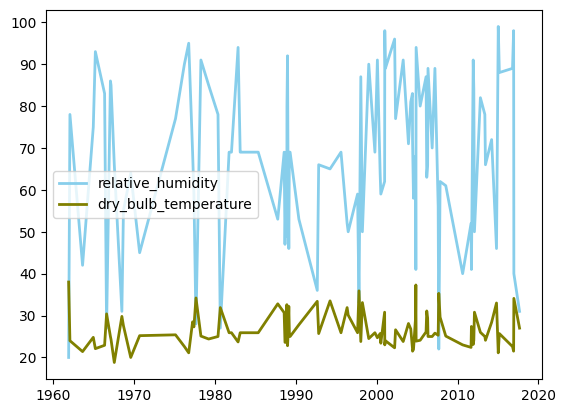

In [114]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

df_to_plot = df.sample(100)

df_to_plot.sort_values(by='date', inplace=True)
# multiple line plots
plt.plot( 'date', 'relative_humidity', data=df_to_plot, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'date', 'dry_bulb_temperature', data=df_to_plot, marker='', color='olive', linewidth=2)
# plt.plot( 'date', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()

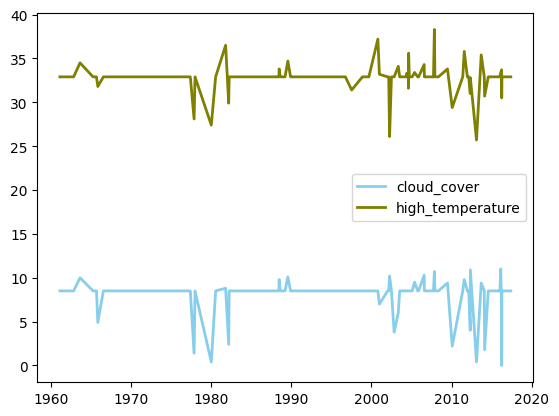

In [117]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 

df_to_plot = df.sample(100)

df_to_plot.sort_values(by='date', inplace=True)
# multiple line plots
plt.plot( 'date', 'cloud_cover', data=df_to_plot, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=2)
plt.plot( 'date', 'high_temperature', data=df_to_plot, marker='', color='olive', linewidth=2)
# plt.plot( 'date', 'y3_values', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

# show legend
plt.legend()

# show graph
plt.show()